# 08/08

## Chi-Square - One Factor

- $H_0$ : Meal preference is as per the perceived ratios of the operations manager
- $H_a$ : Meal preference is dfifferent from the perceived ratios

In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats

observed_values = scipy.array([190, 185, 90, 35])
n = observed_values.sum()

expected_values = [0.3*n, 0.45*n, 0.2*n, 0.05*n]

In [2]:
expected_values

[150.0, 225.0, 100.0, 25.0]

In [3]:
stats.chisquare(observed_values, expected_values)

Power_divergenceResult(statistic=22.77777777777778, pvalue=4.492718590376291e-05)

- observed values dare different from expected values
- meal preference does not match the perceived ratios of the operations manager

In [4]:
# DSE batch - 2-3yrs exp, freshers, 0-1 yrs exp, 3-5 yrs exp
from scipy.stats import chisquare

expected_ratios = np.array([0.3, 0.3, 0.3, 0.1])
observed_values = np.array([15,20,10,5])
n = observed_values.sum()

In [5]:
expected_values = np.array(list(map(lambda x : n*x, expected_ratios)))
expected_values

array([15., 15., 15.,  5.])

In [6]:
chisquare(observed_values, expected_values)

Power_divergenceResult(statistic=3.3333333333333335, pvalue=0.3430301461382424)

- the observed values match the expected proportions

In [7]:
observed_values = np.array([5,30,13,2])
n = observed_values.sum()
expected_values = np.array(list(map(lambda x : n*x, expected_ratios)))
chisquare(observed_values, expected_values)

Power_divergenceResult(statistic=23.733333333333334, pvalue=2.8395742851947475e-05)

## Two -way Anova

The following table shows the quantity of soaps at different discount at locations collected over 20 days.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway

table1  = [['Loc','Dis0','Dis10','Dis20'], [ 1, 20, 28, 32], [ 2, 20, 19, 20],
  [ 1, 16, 23, 29 ],[ 2, 21, 27, 31 ],[ 1, 24, 25, 28 ],[ 2, 23, 23, 35 ],
  [ 1, 20, 31, 27 ],[ 2, 19, 30, 25 ],[ 1, 19, 25, 30 ],[ 2, 25, 25, 31 ],
  [ 1, 10, 24, 26 ],[ 2, 22, 21, 31 ],[ 1, 24, 28, 37 ],[ 2, 25, 33, 31 ],
  [ 1, 16, 23, 33 ],[ 2, 21, 26, 23 ],[ 1, 25, 26, 27 ],[ 2, 26, 22, 22 ],
  [ 1, 16, 25, 31 ],[ 2, 22, 28, 32 ],[ 1, 18, 22, 37 ],[ 2, 25, 24, 22 ],
  [ 1, 20, 24, 28 ],[ 2, 23, 23, 29 ],[ 1, 17, 26, 25 ],[ 2, 23, 26, 25 ],
  [ 1, 26, 28, 23 ],[ 2, 24, 16, 34 ],[ 1, 16, 21, 26 ],[ 2, 20, 30, 30 ],
  [ 1, 21, 27, 33 ],[2, 23, 22, 25 ],[ 1, 24, 25, 28 ],[ 2, 18, 16, 39 ],
  [ 1, 19, 20, 30 ],[ 2, 19, 25, 32 ],[ 1, 19, 26, 30 ],[ 2, 19, 34, 29 ],
  [ 1, 21, 26, 26 ],[ 2, 30, 23, 22 ]]
headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
df1

,Loc,Dis0,Dis10,Dis20
0,1,20,28,32
1,2,20,19,20
2,1,16,23,29
3,2,21,27,31
4,1,24,25,28
5,2,23,23,35
6,1,20,31,27
7,2,19,30,25
8,1,19,25,30
9,2,25,25,31


In [9]:
df1_loc = df1.groupby('Loc')
df1_loc1 = df1_loc.get_group(1)
f_oneway(df1_loc1['Dis0'],df1_loc1['Dis10'],df1_loc1['Dis20'])

F_onewayResult(statistic=40.036012908904226, pvalue=1.3784521432850225e-11)

- There is significant difference between sales for each discount category at location 1
- discount affect sales

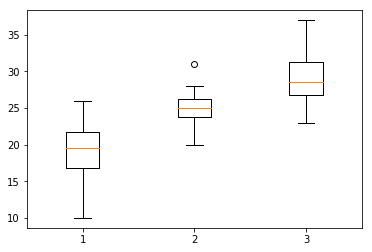

In [10]:
plt.boxplot([df1_loc1['Dis0'],df1_loc1['Dis10'],df1_loc1['Dis20']])
plt.show()

- higher the discount more the sales

In [11]:
df1_loc2 = df1_loc.get_group(2)
f_oneway(df1_loc2['Dis0'],df1_loc2['Dis10'],df1_loc2['Dis20'])

F_onewayResult(statistic=9.367034834324555, pvalue=0.0003038305809287436)

- There is significant difference between sales for each discount category at location 2
- discount affect sales

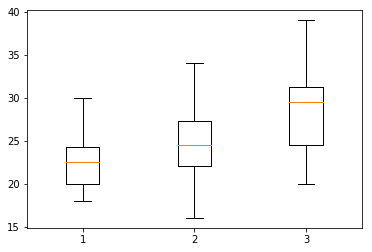

In [12]:
plt.boxplot([df1_loc2['Dis0'],df1_loc2['Dis10'],df1_loc2['Dis20']])
plt.show()

- higher the discount more the sales

In [14]:
d0_val  = df1['Dis0'].values
d10_val = df1['Dis10'].values
d20_val = df1['Dis20'].values
l_val   = df1['Loc'].values

df1   = pd.DataFrame({'Loc': l_val, 'Discount':'0','Qty': d0_val})
df2   = pd.DataFrame({'Loc': l_val, 'Discount':'10','Qty': d10_val})
df3   = pd.DataFrame({'Loc': l_val, 'Discount':'20','Qty': d20_val})

Sale_qty_df = pd.DataFrame()

Sale_qty_df = Sale_qty_df.append(df1) 
Sale_qty_df = Sale_qty_df.append(df2) 
Sale_qty_df = Sale_qty_df.append(df3) 

pd.DataFrame(Sale_qty_df)

,Loc,Discount,Qty
0,1,0,20
1,2,0,20
2,1,0,16
3,2,0,21
4,1,0,24
5,2,0,23
6,1,0,20
7,2,0,19
8,1,0,19
9,2,0,25


The null hypotheses for each of the sets are given below. 

* 1) The population means of the first factor (Discount) are equal. 
* 2) The population means of the second factor (Location) are equal. 
* 3) There is no interaction between the two factors - Discount and Location.

Alternative Hypothesis:

* 1) The population means of the first factor (Discount) are not equal. 
* 2) The population means of the second factor (Location) are not equal. 
* 3) There is an interaction between the two factors - Discount and Location.

In [13]:
import statsmodels.api as sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

In [16]:
formula = 'Qty ~ C(Discount) + C(Loc) + C(Discount):C(Loc)'
model = ols(formula, Sale_qty_df).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Discount),1240.316667,2.0,39.279968,1.055160e-13
C(Loc),7.008333,1.0,0.443898,5.065930e-01
C(Discount):C(Loc),84.816667,2.0,2.686085,7.246036e-02
Residual,1799.850000,114.0,NaN,NaN


- discount rate affects sales quantity
- location does not affect sales quantity
- discount and location interaction does not affect sales quantity

## Linear Regression

In [41]:
a = pd.DataFrame({'x':[3,6,9,10,12,15], 'y':[10,12,15,20,22,25]})
a

,x,y
0,3,10
1,6,12
2,9,15
3,10,20
4,12,22
5,15,25


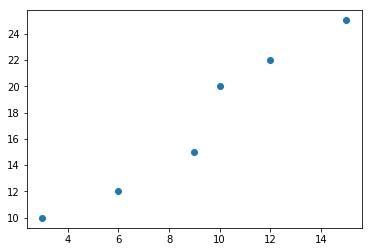

In [43]:
plt.scatter(a['x'], a['y'])
plt.show()

In [44]:
beta1_nr = np.sum((a['x'] - a['x'].mean())*(a['y'] - a['y'].mean()))
beta1_dr = np.sum((a['x'] - a['x'].mean())**2)
beta1 = beta1_nr/beta1_dr
beta1

1.3504587155963304

In [45]:
beta0 = a['y'].mean() - beta1*a['x'].mean()
beta0

4.954128440366972

In [46]:
y_predict = beta0 + beta1*a['x']
y_predict

0     9.005505
1    13.056881
2    17.108257
3    18.458716
4    21.159633
5    25.211009
Name: x, dtype: float64

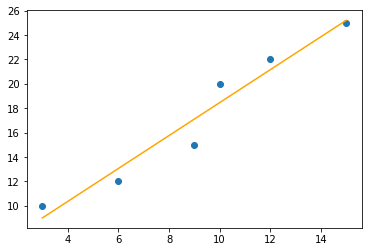

In [49]:
plt.scatter(a['x'], a['y'])
plt.plot(a['x'],y_predict,color='orange')
plt.show()

In [53]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols('y~x',a).fit()
model.params

Intercept    4.954128
x            1.350459
dtype: float64

In [57]:
model.predict(a['x'])

0     9.005505
1    13.056881
2    17.108257
3    18.458716
4    21.159633
5    25.211009
dtype: float64

$\mu$  
$\sigma$  
$\beta$  
$\alpha$

In [59]:
mse = np.sum(((a['y']-y_predict)**2))/len(a['y'])
mse

1.6128440366972485

In [60]:
rmse = np.sqrt(mse)
rmse

1.2699779670125182

In [61]:
mae = np.sum(np.abs(a['y']-y_predict))/len(a['y'])
mae

1.1253822629969419

$SSE = \sum (y_i - \hat{y})^2$  
$SST = \sum (y_i - \bar{y})^2$ (baseline model error)  
$R^2 = 1 - \frac{\sum (y_i - \hat{y})^2} {\sum (y_i - \bar{y})^2}$

In [67]:
R2 = 1 - (np.sum((a['y']-y_predict)**2) / np.sum((a['y']-a['y'].mean())**2))
R2

0.9448076185160638

In [68]:
model.summary()

C:\Users\mohit\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     68.47
Date:                Thu, 08 Aug 2019   Prob (F-statistic):            0.00116
Time:                        12:59:48   Log-Likelihood:                -9.9476
No. Observations:                   6   AIC:                             23.90
Df Residuals:                       4   BIC:                             23.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9541      1.625      3.048      0.038       0.442       9.466
x              1.3505      0.163      8.275      0.001       0.897       1.804
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.090
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.546
Skew:                          -0.433   Prob(JB):                        0.761
Kurtosis:                       1.802   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
adv = pd.read_csv('Advertising.csv',index_col=0)
adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [65]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


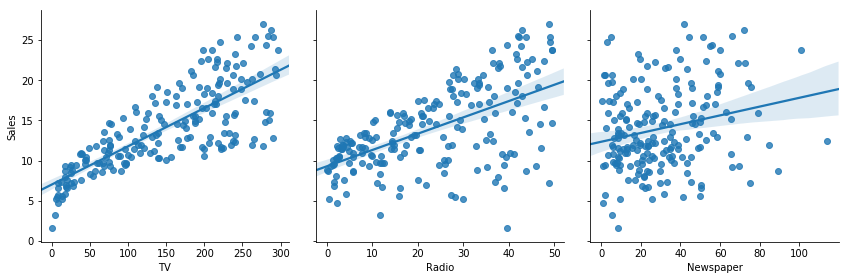

In [82]:
sns.pairplot(adv, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',height=4,kind='reg')
plt.show()

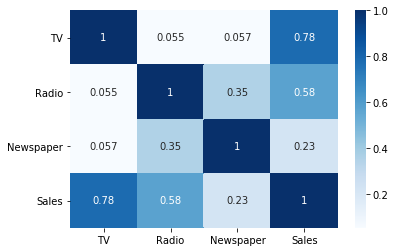

In [78]:
sns.heatmap(adv.corr(),annot=True,cmap='Blues')
plt.show()

In [87]:
# univariate regression
lm1 = smf.ols(formula='Sales ~ TV', data=adv).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           1.47e-42
Time:                        14:25:09   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- pvalue < 0.05 hence it is significantly different from zero
- TV does affect Sales

In [89]:
# bivariate regression
lm2 = smf.ols(formula='Sales ~ TV+Radio', data=adv).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           4.83e-98
Time:                        14:26:03   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- pvalue < 0.05 for both TV and radio; both TV and Radio does affect Sales
- Radio has more impact on Sales than TV since it has a higher coefficient

In [90]:
# multivariate regression
lm3 = smf.ols(formula='Sales ~ TV+Radio+Newspaper', data=adv).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           1.58e-96
Time:                        14:26:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- pvalues > 0.05 for Newspaper; hence its coeff is zero
- Newspaper has no effect on Sales

In [154]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [155]:
x = adv[['TV','Radio']]
y = adv['Sales']

In [156]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=0)

In [157]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [158]:
model.intercept_

2.909895690512924

In [159]:
model.coef_

array([0.04396652, 0.20099526])

In [160]:
print('R^2 =', model.score(xtrain,ytrain))

R^2 = 0.9065235649327258


In [163]:
# training error
y_pred = model.predict(xtrain)

mse = metrics.mean_squared_error(y_pred,ytrain)
mae = metrics.mean_absolute_error(y_pred,ytrain)
print('MAE =', mae)
print('MSE =', mse)
print('RMSE =', np.sqrt(mse))

MAE = 1.250463168471152
MSE = 2.4877454061475825
RMSE = 1.577258826619012


In [165]:
# test error
y_pred = model.predict(xtest)

mse = metrics.mean_squared_error(y_pred,ytest)
mae = metrics.mean_absolute_error(y_pred,ytest)
print('MAE =', mae)
print('MSE =', mse)
print('RMSE =', np.sqrt(mse))

MAE = 1.225485745624586
MSE = 3.670809675491495
RMSE = 1.9159357179956469
